### DATA CLEANING

In [ ]:
#DATA CLEANING SCRIPT
import pandas as pd
import numpy as np
import re
import sys

# Redirect output to both console and file for Part 1
class DualOutput:
    def __init__(self, filename):
        self.terminal = sys.stdout
        self.log = open(filename, "w", encoding="utf-8")
    def write(self, message):
        self.terminal.write(message)
        self.log.write(message)
    def flush(self):
        self.terminal.flush()
        self.log.flush()

sys.stdout = DualOutput("data_cleaning.txt")

# ==============================
# Step 1: Display first few rows
# ==============================
file_path = 'sample_data_cleaning.csv'  # Change to your CSV file path
df = pd.read_csv(file_path)

print("First 5 rows of the dataset:")
print(df.head())
print(df.tail())

# =======================================
# Step 2: Dataset Columns
# =======================================
print("\n\n\ndataset columns:")
print(df.columns)

# =======================================
# Step 3: Data Types
# =======================================
print("\n\n\nData Types:")
print(df.dtypes)
# =======================================
# Step 4: Identify Missing Values
# =======================================
print("\n\n\nMissing Values in Each Column:")
print(df.info())
print(df.isnull().sum())

# ===================================================================================
# Step 5: Data Cleaning - Remove rows with only special characters or NaN in any cell
# ===================================================================================
def contains_only_special_chars(value):
    if pd.isna(value):
        return True
    return bool(re.fullmatch(r'[^a-zA-Z0-9]+', str(value)))

df_cleaned = df[~df.applymap(contains_only_special_chars).any(axis=1)]

print("\n\n\nAfter cleaning (removing rows with only special characters or NaN in any column):")
print(df_cleaned.head())

# Save cleaned data for Part 2
cleaned_file_path = "cleaned_file.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\n\n\nCleaned data saved to {cleaned_file_path}")

# Restore stdout
sys.stdout.log.close()
sys.stdout = sys.stdout.terminal



### BASIC STATISTICS AND NORMALIZATION

In [ ]:
#BASIC STATISTICS AND NORMALIZATION SCRIPT
import pandas as pd
import numpy as np
import sys

# Redirect output to both console and file for Part 2
class DualOutput:
    def __init__(self, filename):
        self.terminal = sys.stdout
        self.log = open(filename, "w", encoding="utf-8")
    def write(self, message):
        self.terminal.write(message)
        self.log.write(message)
    def flush(self):
        self.terminal.flush()
        self.log.flush()

sys.stdout = DualOutput("statistics & normalization.txt")

# Load cleaned data from Part 1
cleaned_file_path = "cleaned_file.csv"
df_cleaned = pd.read_csv(cleaned_file_path)

# =======================================
# Step 1: Basic Statistics
# =======================================
print("\nBasic Statistics of Cleaned Data:")
print(df_cleaned.describe())
# ===============================================================
# Step 2: Calculate Basic Statistics for Numerical Columns
# Based on cleaned data & display all column values
# ===============================================================
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()


print("\n\n\nBasic Statistics (Cleaned Data):")
for col in numerical_cols:
    mean_val = np.mean(df_cleaned[col])
    median_val = np.median(df_cleaned[col])
    mode_val = df_cleaned[col].mode()[0] if not df_cleaned[col].mode().empty else np.nan
    
    print(f"\nColumn: {col}")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")

# ===============================================================
# Step 3: Normalize Numerical Features using Min-Max Scaling
# Based on cleaned data & display all column values
# ===============================================================
print("\n\n\nNormalized Numerical Features (Cleaned Data):")
normalized_df = df_cleaned.copy()

for col in numerical_cols:
    min_val = df_cleaned[col].min()
    max_val = df_cleaned[col].max()
    if max_val - min_val != 0:
        normalized_df[col] = (df_cleaned[col] - min_val) / (max_val - min_val)
    else:
        normalized_df[col] = 0  # Avoid division by zero

print(normalized_df[numerical_cols].head())

# ===============================================================
# Step 4: Save the normalized data
# ===============================================================
normalized_df.to_csv('normalized_dataset.csv', index=False)
print("\n\n\nNormalized data saved to 'normalized_dataset.csv'")

# Restore stdout
sys.stdout.log.close()
sys.stdout = sys.stdout.terminal



In [ ]:
df.info()
df.columns
df.dtypes
df.nunique
df.describe()
df.duplicated()
df.isnull().sum()

### DATA TRANSFORMATION

In [ ]:
# DATA TRANSFORMATION
import pandas as pd
import numpy as np
import sys

class DualOutput:
    def __init__(self, filename):
        self.terminal = sys.stdout
        self.log = open(filename, "w", encoding="utf-8")
    def write(self, message):
        self.terminal.write(message)
        self.log.write(message)
    def flush(self):
        self.terminal.flush()
        self.log.flush()

sys.stdout = DualOutput("data_transformation.txt")


# Load cleaned data
df_cleaned = pd.read_csv("cleaned_file.csv")
print("Initial Cleaned Data:")
print(df_cleaned.head())

# =========================
# Step 1: Data Type Conversion
# =========================
df_cleaned['OrderID'] = df_cleaned['OrderID'].astype(int)
df_cleaned['Quantity'] = df_cleaned['Quantity'].astype(int)

# If you have a date column and want datetime conversion
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

print("\nAfter Data Type Conversion:")
print(df_cleaned.dtypes)

# =========================
# Step 2: Feature Engineering
# =========================

# Average 'Total' per product
df_cleaned['Average_Total'] = df_cleaned.groupby("Product")["Total"].transform('mean')

# Total quantity sold per product
df_cleaned['Total_Quantity_Product'] = df_cleaned.groupby("Product")["Quantity"].transform('sum')

# Revenue per order (if Total is not already per order)
if 'Price' in df_cleaned.columns:
    df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['Price']
else:
    df_cleaned['Revenue'] = df_cleaned['Total']  # Assuming 'Total' is revenue

# Cumulative sales per product (running total)
df_cleaned['Cumulative_Sales'] = df_cleaned.groupby("Product")['Revenue'].cumsum()

# Profit margin calculation (assuming 'Total' is cost)
df_cleaned['profit margin'] = df_cleaned['Revenue'] - df_cleaned['Total'] / df_cleaned['Revenue']
# # Price per unit (if Quantity > 0)
# df_cleaned['Price_per_Unit'] = df_cleaned.apply(lambda x: x['Total']/x['Quantity'] if x['Quantity'] != 0 else np.nan, axis=1)

# =========================
# Step 3: Date Column Split
# =========================
if 'Date' in df_cleaned.columns:
    df_cleaned['Month'] = df_cleaned['Date'].dt.strftime('%B')  # Full month name
    df_cleaned['Year'] = df_cleaned['Date'].dt.year
    print("\nDate column split into 'Month' and 'Year'")
else:
    print("\nNo Date column found to split")


# =========================
# Step 4: Final Output
# =========================
print("\nAfter Feature Engineering and Date Split:")
print(df_cleaned.head())

# Save transformed data
df_cleaned.to_csv("transformed_file.csv", index=False)
print("\nTransformed data saved to 'transformed_file.csv'")

# Restore stdout
sys.stdout.log.close()
sys.stdout = sys.stdout.terminal


### EXPLORATORY DATA ANALYSIS

In [ ]:
# EXPLORATORY DATA ANALYSIS
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned = pd.read_csv("transformed_file.csv")

# =========================
# Step : Correlation Matrix
# =========================
corr_matrix = df_cleaned.corr(numeric_only=True)
# print("\nCorrelation Matrix (Numeric Columns):")
# print(corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### DATA VISUALIZATION

In [ ]:
import pandas as pd
import numpy as np 
import sys
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = pd.read_csv("transformed_file.csv")
# print("Initial Cleaned Data:")

# class DualOutput:
#     def __init__(self, filename):
#         self.terminal = sys.stdout
#         self.log = open(filename, "w", encoding="utf-8")
#     def write(self, message):
#         self.terminal.write(message)
#         self.log.write(message)
#     def flush(self):
#         self.terminal.flush()
#         self.log.flush()

# sys.stdout = DualOutput("visualization.txt")
# =========================
# Step 1: BAR CHART
# =========================
plt.figure(figsize=(10, 6))
# sns.barplot(data=df_cleaned, x='Product', y='Total', edgecolor='black', palette='viridis')
sns.barplot(data=df_cleaned, x='Product', y='Total', edgecolor='black')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


# =========================
# Step 2: HISTOGRAM
# =========================
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Revenue'], bins=25, color='teal', edgecolor='black', kde=True)
plt.title('Distribution of Total Sales')


# =========================
# Step 3: SACTTER PLOT
# =========================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Product', y='Total', hue='Quantity', style='Quantity', palette='deep')
# sns.scatterplot(data=df_cleaned, x='Product', y='Total')
plt.title('Total Sales vs Quantity Sold by Product')


# =========================
# Step 4: LINE CHART
# =========================
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cleaned, x='Month', y='Total', hue='Year', marker='o')
plt.title('Total Sales Over Months by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# # Restore stdout
# sys.stdout.log.close()
# sys.stdout = sys.stdout.terminal

Step 1: Understanding the Problem & Objectives

Goal: Perform EDA to understand dataset structure, quality, 
relationships, and extract meaningful insights for further analysis.


Step 2: Load & Inspect the Data
Shape of dataset: (12, 14)

First 5 rows:
    OrderID   Product   Price  Quantity    Total        Date Customer  \
0     1001  Keyboard  631.26         4  2525.04  2023-01-02    Alice   
1     1002    Tablet  182.52         2   365.04  2023-02-03      Eve   
2     1003  Keyboard  327.54         4  1310.16  2023-01-04      Eve   
3     1009  Keyboard  538.52         2  1077.04  2023-04-10    Diana   
4     1011    Tablet  612.79         2  1225.58  2023-11-12      Eve   

   Average_Total  Total_Quantity_Product  Revenue  Cumulative_Sales  \
0    1855.230000                      14  2525.04           2525.04   
1    1444.056667                       7   365.04            365.04   
2    1855.230000                      14  1310.16           3835.20   
3    1855.230000            

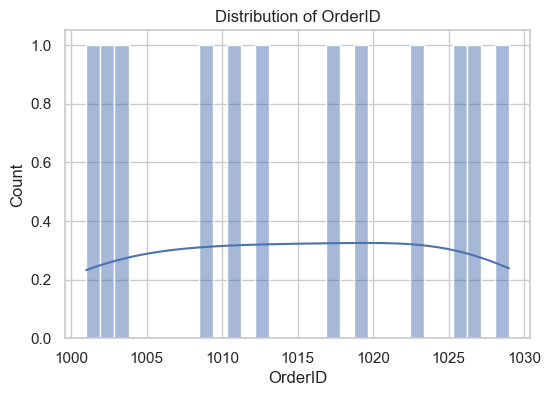

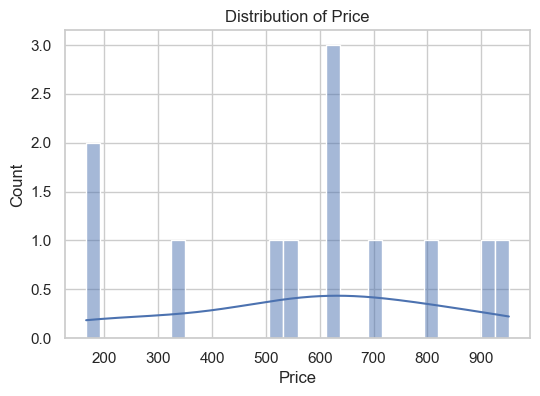

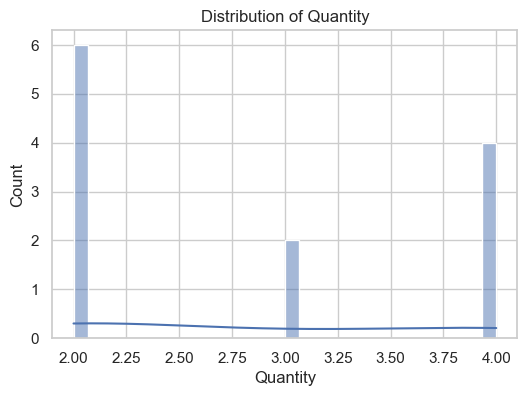

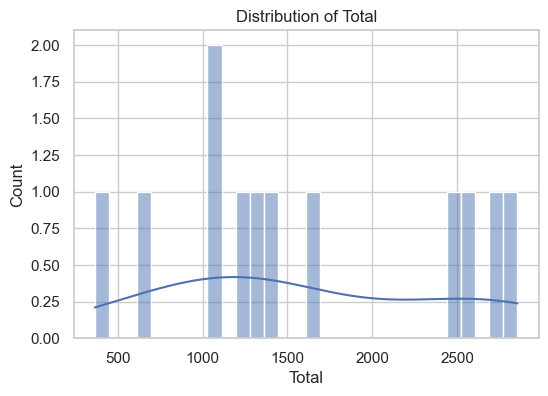

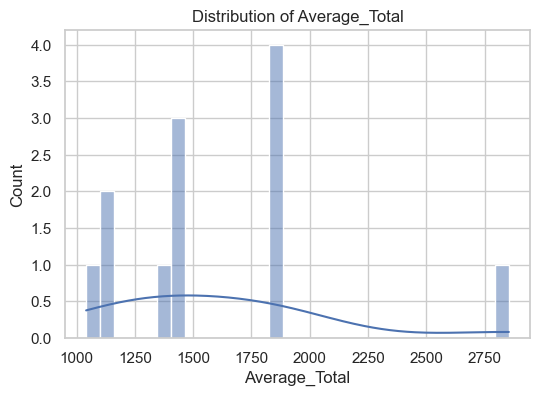

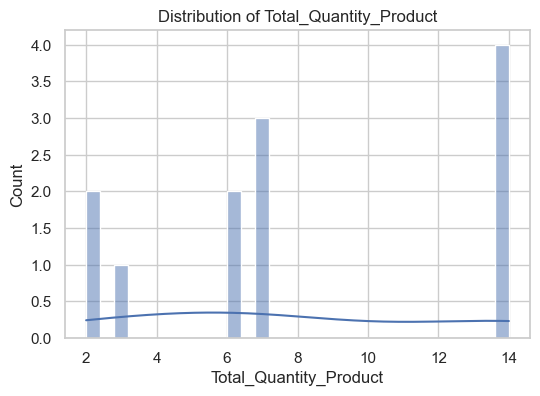

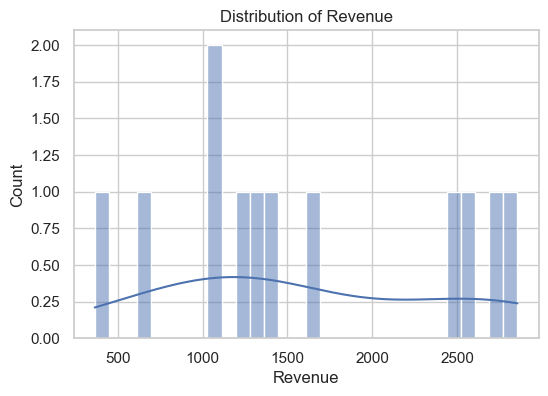

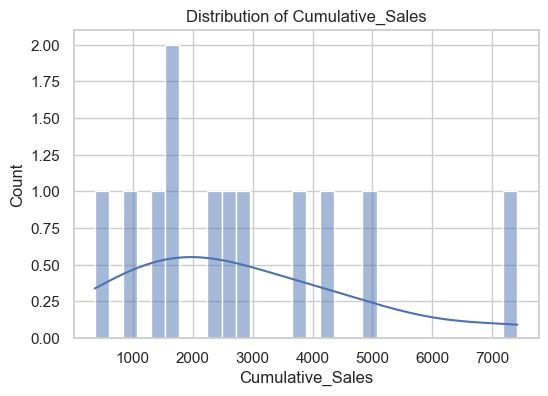

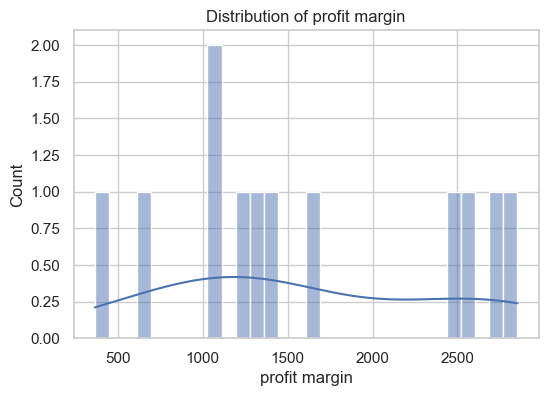

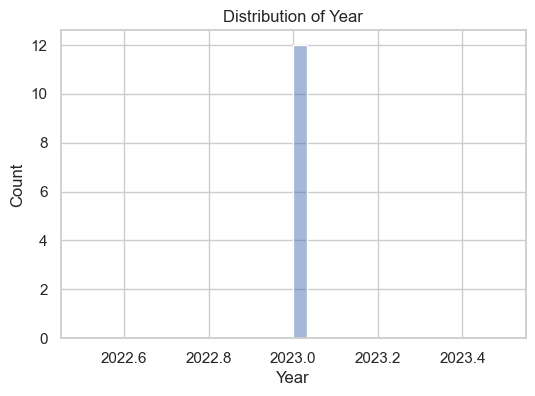

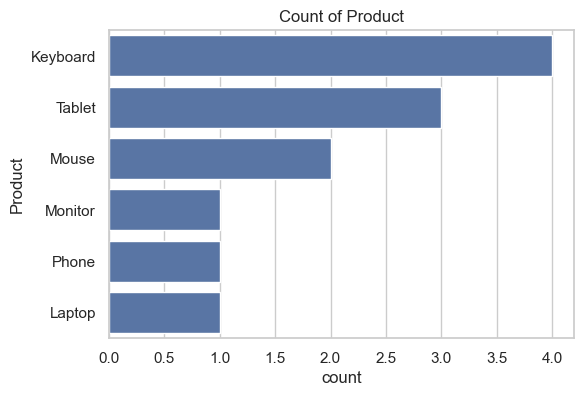

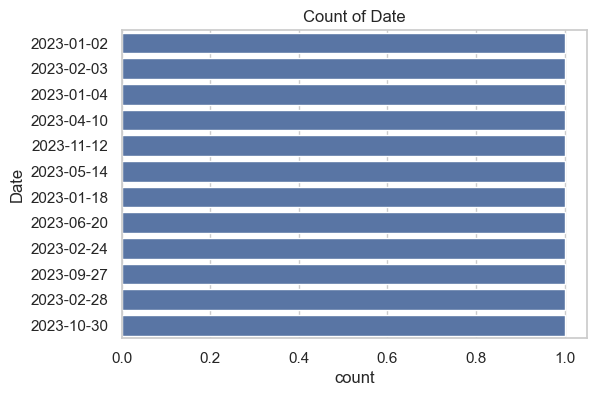

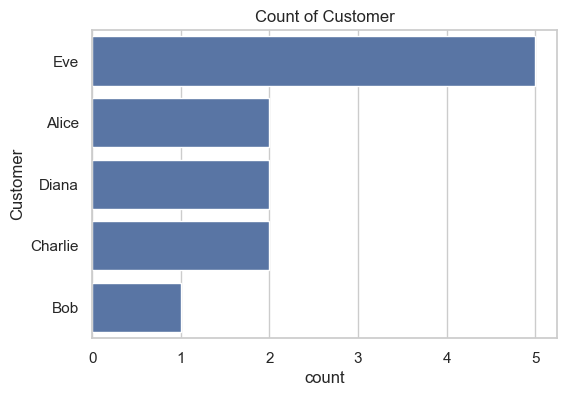

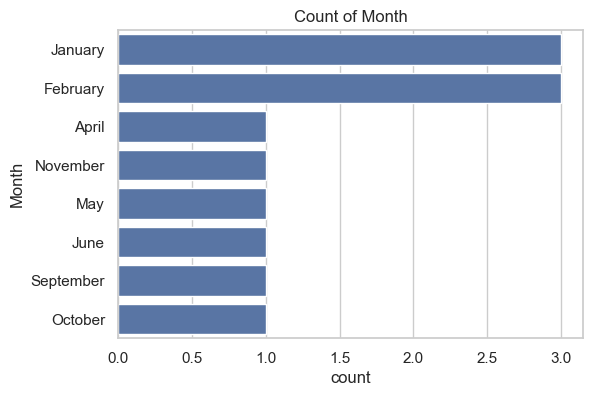


Step 5: Bivariate Analysis


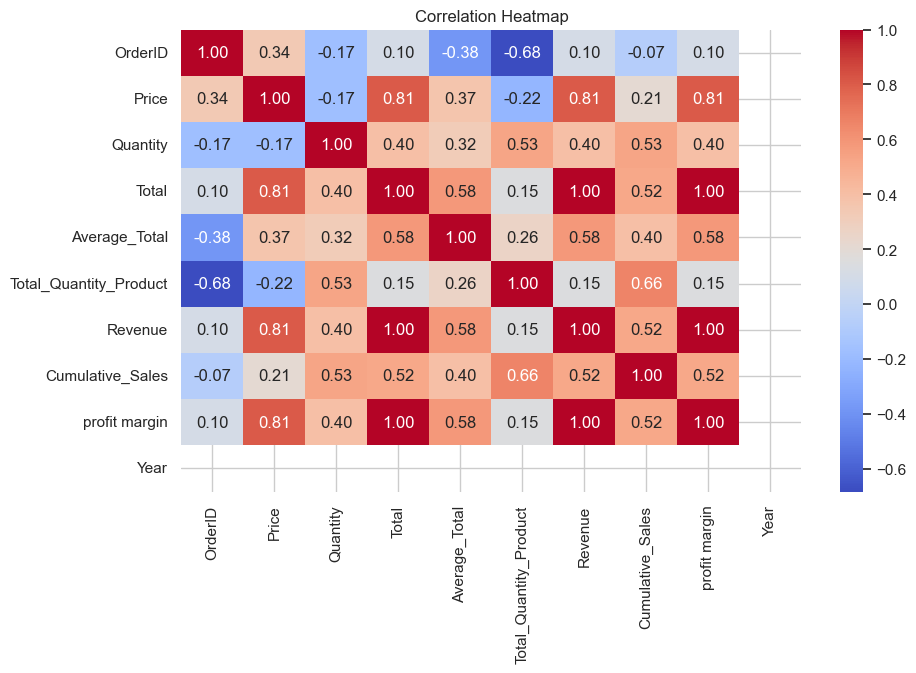

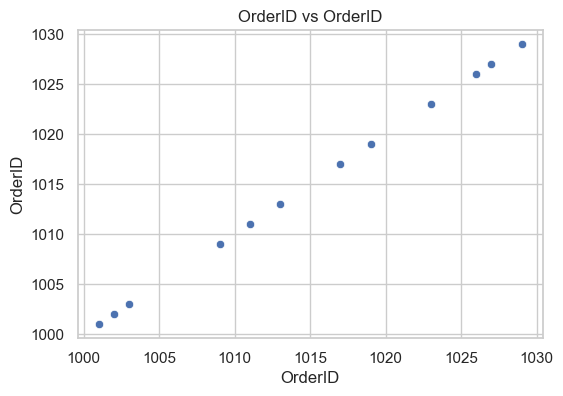

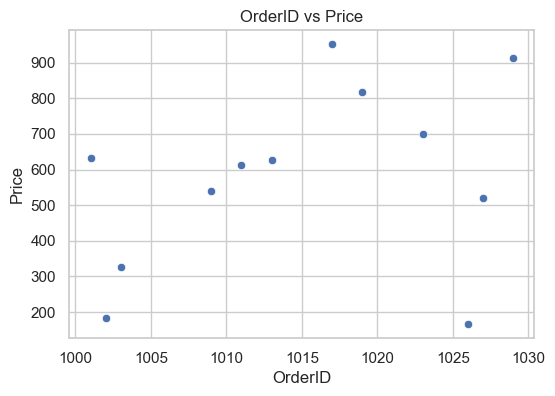

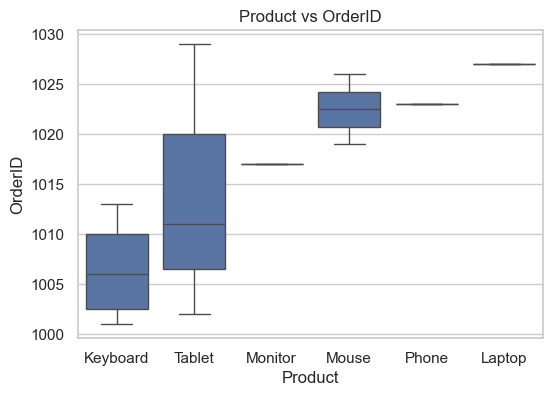

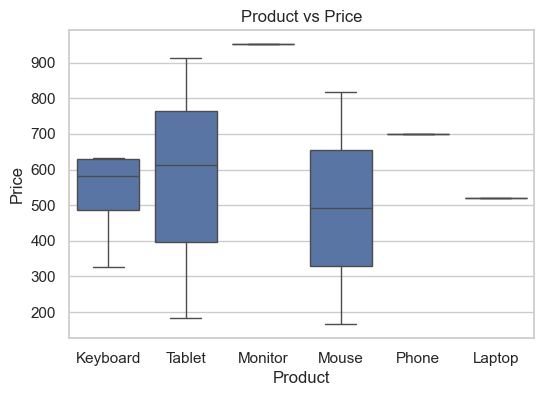


Step 6: Multivariate Analysis


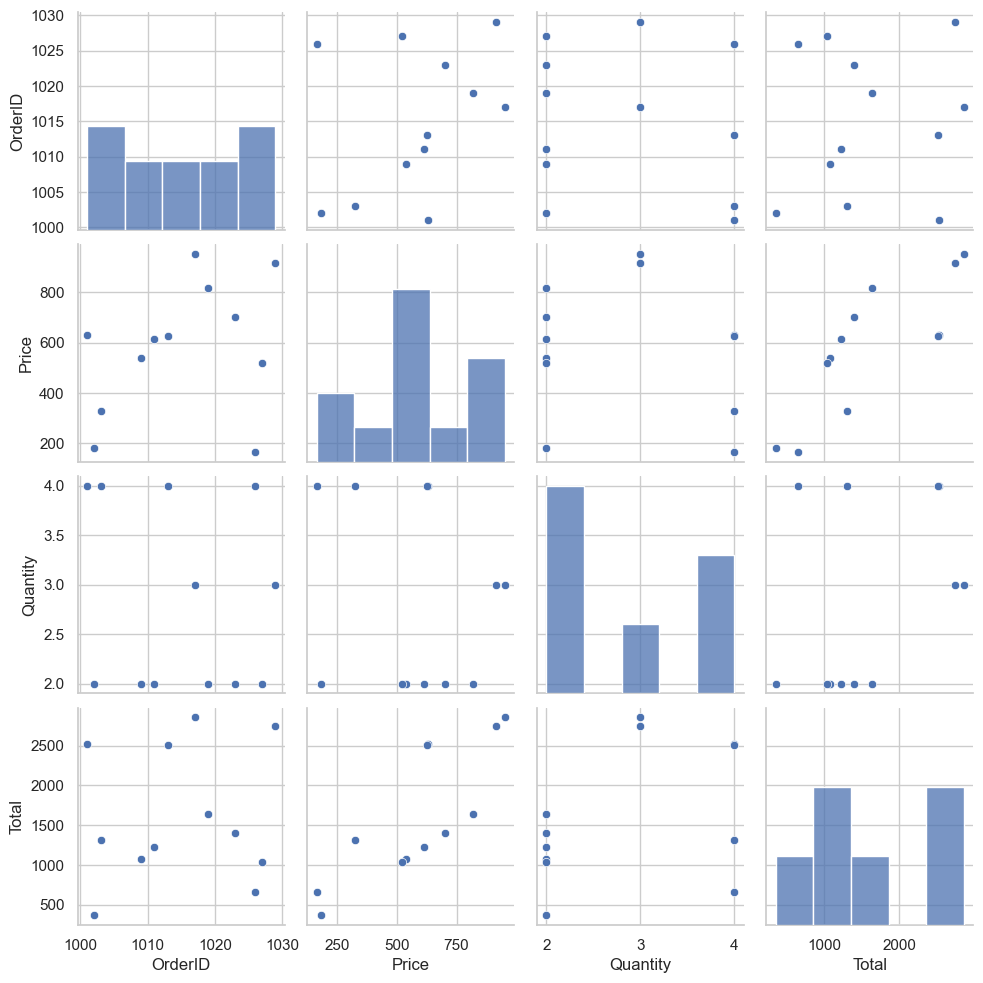


Group by Example:
          OrderID     Price  Quantity        Total  Average_Total  \
Product                                                             
Keyboard   1006.5  531.1225  3.500000  1855.230000    1855.230000   
Laptop     1027.0  520.4200  2.000000  1040.840000    1040.840000   
Monitor    1017.0  951.4400  3.000000  2854.320000    2854.320000   
Mouse      1022.5  491.9600  3.000000  1149.860000    1149.860000   
Phone      1023.0  700.0200  2.000000  1400.040000    1400.040000   
Tablet     1014.0  569.7200  2.333333  1444.056667    1444.056667   

          Total_Quantity_Product      Revenue  Cumulative_Sales  \
Product                                                           
Keyboard                    14.0  1855.230000       4673.350000   
Laptop                       2.0  1040.840000       1040.840000   
Monitor                      3.0  2854.320000       2854.320000   
Mouse                        6.0  1149.860000       1967.840000   
Phone                     

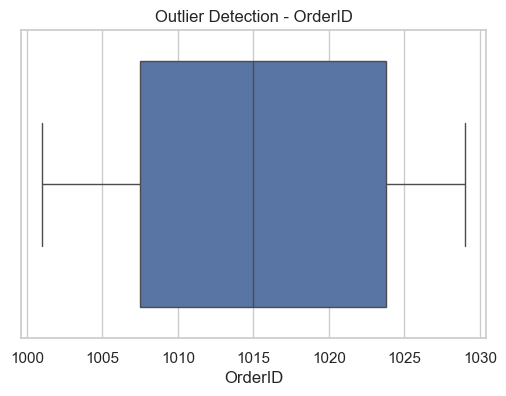

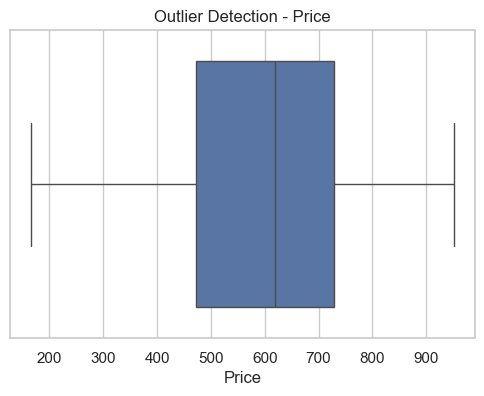

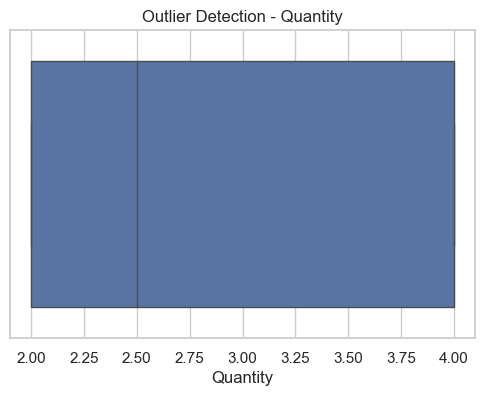

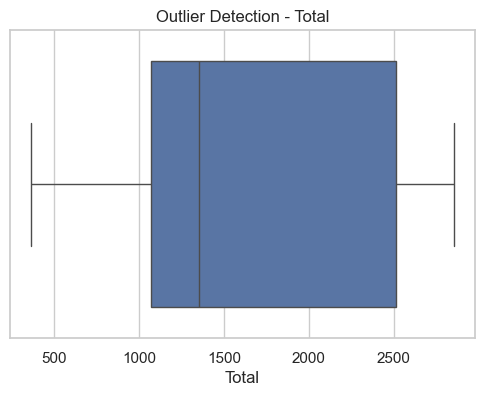

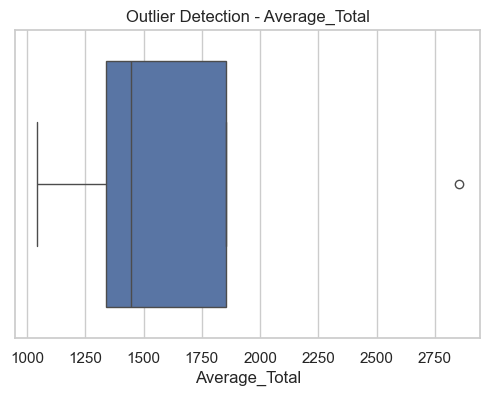

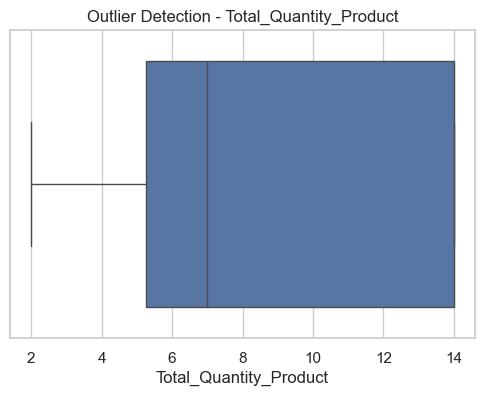

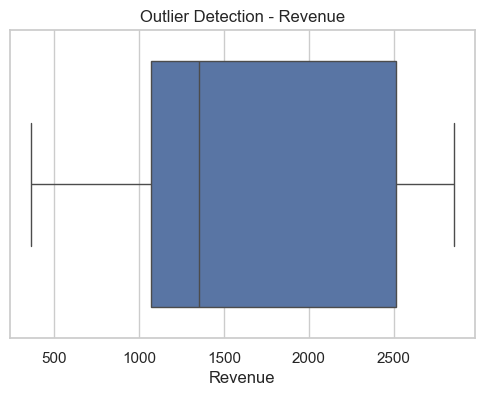

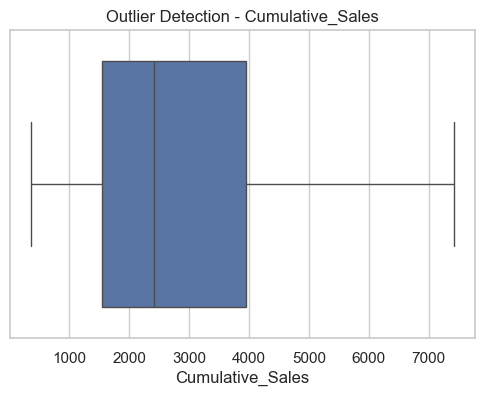

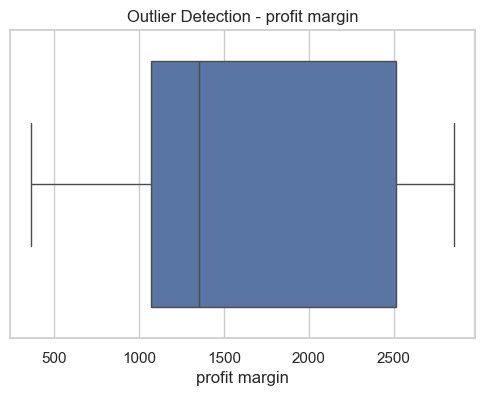

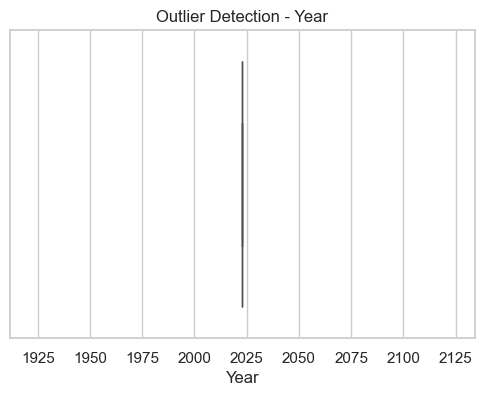


Step 8: Hypothesis Generation (Quantitative Exploration)

Strong correlations (> 0.5):
 Price                   Total                     0.805329
                        Revenue                   0.805329
                        profit margin             0.805329
Quantity                Total_Quantity_Product    0.526787
                        Cumulative_Sales          0.529555
Total                   Price                     0.805329
                        Average_Total             0.583945
                        Cumulative_Sales          0.516405
Average_Total           Total                     0.583945
                        Revenue                   0.583945
                        profit margin             0.583945
Total_Quantity_Product  Quantity                  0.526787
                        Cumulative_Sales          0.661109
Revenue                 Price                     0.805329
                        Average_Total             0.583945
                        Cu

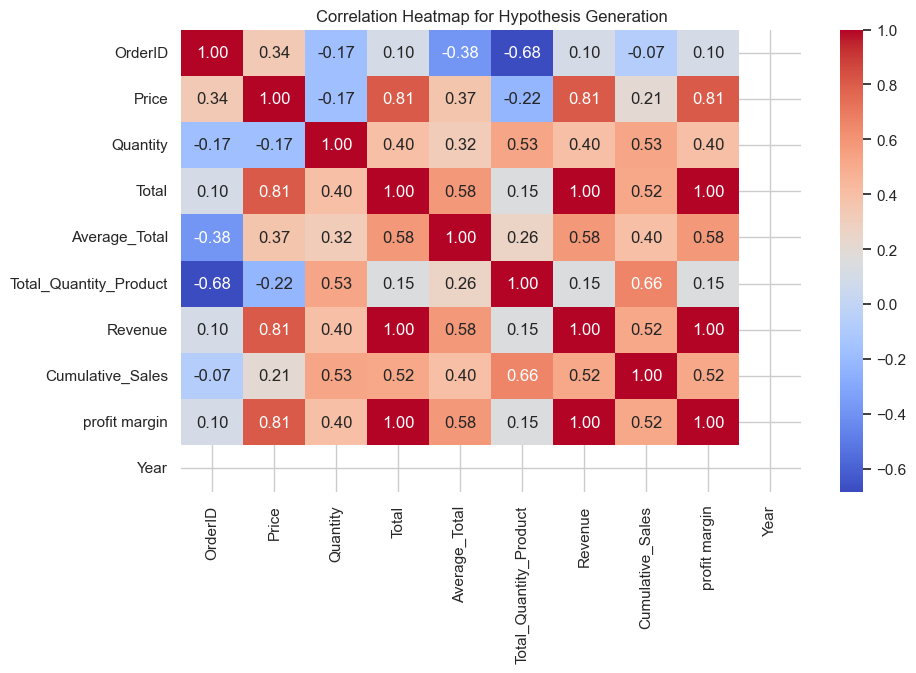


Group mean values for OrderID by Product:
 Product
Keyboard    1006.5
Laptop      1027.0
Monitor     1017.0
Mouse       1022.5
Phone       1023.0
Tablet      1014.0
Name: OrderID, dtype: float64


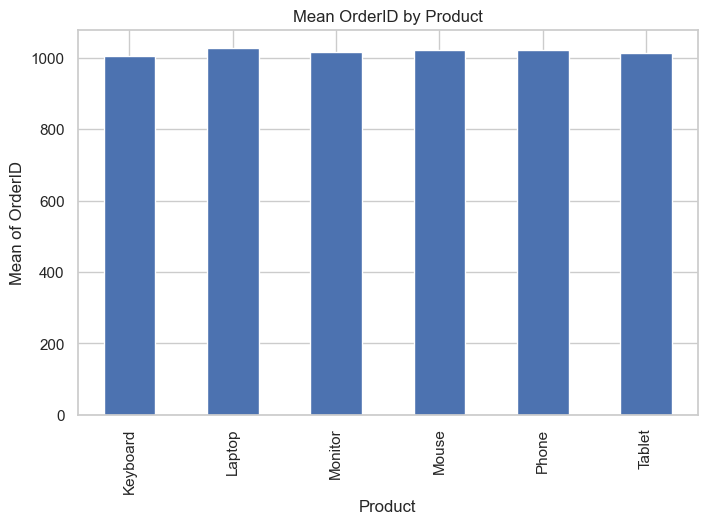


Step 9: Summarize Key Insights (Numeric + Charts)

Top 5 correlations:
Price                   Revenue             0.805329
Total_Quantity_Product  Cumulative_Sales    0.661109
Average_Total           profit margin       0.583945
                        Total               0.583945
Quantity                Cumulative_Sales    0.529555
dtype: float64

Outlier summary:
                   Feature  Outlier Count
0                 OrderID              0
1                   Price              0
2                Quantity              0
3                   Total              0
4           Average_Total              1
5  Total_Quantity_Product              0
6                 Revenue              0
7        Cumulative_Sales              0
8           profit margin              0
9                    Year              0


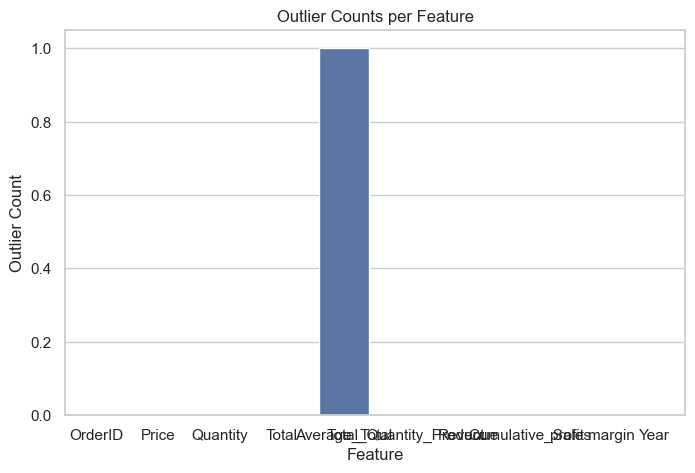


Step 10: Prepare for Further Analysis (Numeric Evidence)

Missing Values (%):
 Series([], dtype: float64)

First 5 values of OrderID (scaled):
    OrderID  OrderID_scaled
0     1001        0.000000
1     1002        0.035714
2     1003        0.071429
3     1009        0.285714
4     1011        0.357143


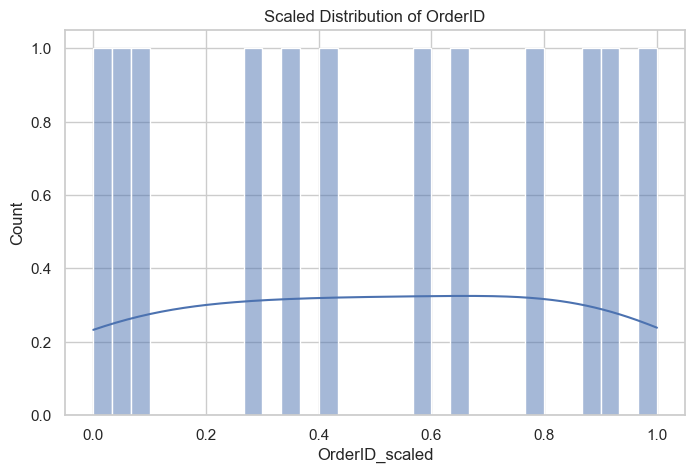

In [4]:
# =========================================================
# STEP 0: IMPORT LIBRARIES
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Load dataset
df_cleaned = pd.read_csv("transformed_file.csv")

# =========================================================
# STEP 1: UNDERSTAND THE PROBLEM & OBJECTIVES
# =========================================================
print("Step 1: Understanding the Problem & Objectives")
print("""
Goal: Perform EDA to understand dataset structure, quality, 
relationships, and extract meaningful insights for further analysis.
""")

# =========================================================
# STEP 2: LOAD & INSPECT THE DATA
# =========================================================
print("\nStep 2: Load & Inspect the Data")
print("Shape of dataset:", df_cleaned.shape)
print("\nFirst 5 rows:\n", df_cleaned.head())
print("\nData types:\n", df_cleaned.dtypes)
print("\nSummary statistics:\n", df_cleaned.describe(include='all').T)

# =========================================================
# STEP 3: CHECK DATA QUALITY
# =========================================================
print("\nStep 3: Check Data Quality")
print("\nMissing values:\n", df_cleaned.isnull().sum())
print("\nDuplicate rows:", df_cleaned.duplicated().sum())

# =========================================================
# STEP 4: UNIVARIATE ANALYSIS
# =========================================================
print("\nStep 4: Univariate Analysis")

# Numeric columns distribution
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical columns distribution
categorical_cols = df_cleaned.select_dtypes(exclude=np.number).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df_cleaned, order=df_cleaned[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.show()

# =========================================================
# STEP 5: BIVARIATE ANALYSIS
# =========================================================
print("\nStep 5: Bivariate Analysis")

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatterplots for numeric pairs
if len(numeric_cols) >= 2:
    for col in numeric_cols[:2]:  # Just first 2 for demo
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=numeric_cols[0], y=col, data=df_cleaned)
        plt.title(f"{numeric_cols[0]} vs {col}")
        plt.show()

# Categorical vs Numeric (boxplot)
for cat in categorical_cols[:1]:  # First categorical
    for num in numeric_cols[:2]:  # First 2 numeric
        plt.figure(figsize=(6,4))
        sns.boxplot(x=cat, y=num, data=df_cleaned)
        plt.title(f"{cat} vs {num}")
        plt.show()

# =========================================================
# STEP 6: MULTIVARIATE ANALYSIS
# =========================================================
print("\nStep 6: Multivariate Analysis")

# Pairplot (first 4 numeric cols to avoid heavy plots)
sns.pairplot(df_cleaned[numeric_cols[:4]])
plt.show()

# Grouping by categorical variable
if categorical_cols:
    print("\nGroup by Example:")
    print(df_cleaned.groupby(categorical_cols[0])[numeric_cols].mean())

# =========================================================
# STEP 7: IDENTIFY PATTERNS, TRENDS & OUTLIERS
# =========================================================
print("\nStep 7: Identify Patterns, Trends & Outliers")

# Boxplots for outliers
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Outlier Detection - {col}")
    plt.show()

# Trend over time if a date column exists
date_cols = df_cleaned.select_dtypes(include=['datetime64']).columns.tolist()
if date_cols:
    for d in date_cols:
        plt.figure(figsize=(10,4))
        df_cleaned.groupby(d)[numeric_cols[0]].mean().plot()
        plt.title(f"Trend of {numeric_cols[0]} over {d}")
        plt.show()
# =========================================================
# STEP 8: HYPOTHESIS GENERATION (Quantitative Exploration)
# =========================================================
print("\nStep 8: Hypothesis Generation (Quantitative Exploration)")

# Example Hypothesis 1: Correlation > 0.5 means strong positive relation
cor_matrix = df_cleaned.corr(numeric_only=True)
strong_corr = cor_matrix[(cor_matrix > 0.5) & (cor_matrix < 1.0)].stack()
print("\nStrong correlations (> 0.5):\n", strong_corr)

plt.figure(figsize=(10,6))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Hypothesis Generation")
plt.show()

# Example Hypothesis 2: Mean difference between categories
if df_cleaned.select_dtypes(exclude=np.number).shape[1] > 0:
    cat = df_cleaned.select_dtypes(exclude=np.number).columns[0]
    num = df_cleaned.select_dtypes(include=np.number).columns[0]
    mean_values = df_cleaned.groupby(cat)[num].mean()
    print(f"\nGroup mean values for {num} by {cat}:\n", mean_values)

    plt.figure(figsize=(8,5))
    mean_values.plot(kind="bar")
    plt.title(f"Mean {num} by {cat}")
    plt.ylabel(f"Mean of {num}")
    plt.show()

# =========================================================
# STEP 9: SUMMARIZE KEY INSIGHTS (Numeric + Charts)
# =========================================================
print("\nStep 9: Summarize Key Insights (Numeric + Charts)")

# Top correlations summary
print("\nTop 5 correlations:")
print(cor_matrix.unstack().sort_values(ascending=False).drop_duplicates()[1:6])

# Outlier count summary
outlier_summary = {}
for col in df_cleaned.select_dtypes(include=np.number).columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cleaned[(df_cleaned[col] < (Q1 - 1.5*IQR)) | (df_cleaned[col] > (Q3 + 1.5*IQR))]
    outlier_summary[col] = outliers.shape[0]

outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=["Feature", "Outlier Count"])
print("\nOutlier summary:\n", outlier_df)

plt.figure(figsize=(8,5))
sns.barplot(x="Feature", y="Outlier Count", data=outlier_df)
plt.title("Outlier Counts per Feature")
plt.show()

# =========================================================
# STEP 10: PREPARE FOR FURTHER ANALYSIS (Practical Prep)
# =========================================================
print("\nStep 10: Prepare for Further Analysis (Numeric Evidence)")

# Missing value percentage
missing_perc = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
missing_df = missing_perc[missing_perc > 0].sort_values(ascending=False)
print("\nMissing Values (%):\n", missing_df)

if not missing_df.empty:
    plt.figure(figsize=(8,5))
    missing_df.plot(kind="bar")
    plt.title("Missing Values Percentage by Column")
    plt.ylabel("Percentage %")
    plt.show()

# Scaling example (for first numeric feature)
from sklearn.preprocessing import MinMaxScaler

if len(df_cleaned.select_dtypes(include=np.number).columns) > 0:
    scaler = MinMaxScaler()
    num = df_cleaned.select_dtypes(include=np.number).columns[0]
    df_cleaned[f"{num}_scaled"] = scaler.fit_transform(df_cleaned[[num]])
    print(f"\nFirst 5 values of {num} (scaled):\n", df_cleaned[[num, f"{num}_scaled"]].head())

    plt.figure(figsize=(8,5))
    sns.histplot(df_cleaned[f"{num}_scaled"], bins=30, kde=True)
    plt.title(f"Scaled Distribution of {num}")
    plt.show()
